# readme
descrip: plot EOF analysis for Altimeter SSH for North Atlantic

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

In [2]:
indir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/SSH/'
infile1_TL = indir + 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100.regrid_2021Apr05.nc'
lat1, lat2 = 20, 65
lon1, lon2 = -90+360, 360 # 90W
ds_TL = xr.open_dataset(infile1_TL)
ssh_TL_yr = ds_TL.SSH.sel(lat=slice(lat1, lat2),lon=slice(lon1, lon2)) # unit: cm
ssh_TL_yr

<xarray.DataArray 'SSH' (time: 251, lat: 45, lon: 90)>
[1016550 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-07-02 06:00:00 ... 2100-07-02 05:00:00.000003
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5
Attributes:
    spatial_op:    Bilinear remapping: 1st order: destarea: NCL: ./map_gx1v6_...
    cell_methods:  time: mean
    grid_loc:      2110
    coordinates:   TLONG TLAT 
    units:         centimeter
    long_name:     Sea Surface Height

In [3]:
ssh_TL_yra = ssh_TL_yr - ssh_TL_yr.mean('time') # yra: yearly anomaly
ssh_TL_yra

<xarray.DataArray 'SSH' (time: 251, lat: 45, lon: 90)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.30467415, -0.18729019, -0.27261162, ...,         nan,
                 nan,         nan],
        ...,
        [-3.089302  , -3.0095901 , -3.1517105 , ..., -2.324524  ,
         -2.2117004 , -1.9874496 ],
        [-3.3097954 , -3.259716  , -3.2590675 , ..., -2.783165  ,
         -2.7814407 , -2.648407  ],
        [        nan,         nan,         nan, ..., -3.87146   ,
         -3.4409256 , -3.4863205 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.7052727 , -0.64081   , -0.6386385 , ...,         nan,
                 nan,         nan],
...
        [19.578852  , 19.31284   , 19.910162  , ..., 11.374519  ,
         12.323742  , 13.198742  ],
        [20.216022  , 20.069626  , 20.284492  , ..., 11.470444  ,
         11.611679  , 11.587311  ],
        [        nan,         nan,         nan, ..., 11.354881  ,
         10.470352  , 11.089424  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 4.9981947 ,  4.9411182 ,  4.5625534 , ...,         nan,
                 nan,         nan],
        ...,
        [17.427216  , 17.971565  , 18.51566   , ...,  9.0070305 ,
         10.240753  , 11.432533  ],
        [18.998554  , 18.67696   , 19.006123  , ...,  8.404594  ,
          9.068634  ,  9.452164  ],
        [        nan,         nan,         nan, ...,  8.290405  ,
          7.9365387 ,  8.810387  ]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-07-02 06:00:00 ... 2100-07-02 05:00:00.000003
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5

In [4]:
coslat = np.cos(np.deg2rad(ssh_TL_yra.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(ssh_TL_yra, weights=wgts)
variance_fractions = solver.varianceFraction(neigs=3)
variance_fractions

<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.7381679 , 0.07070947, 0.04573211], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

<xarray.DataArray 'eofs' (mode: 3, lat: 45, lon: 90)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [ 9.1694230e-03,  9.3984427e-03,  8.1680473e-03, ...,
                    nan,            nan,            nan],
        ...,
        [ 2.2882385e-02,  2.3701327e-02,  2.3717256e-02, ...,
          7.9104463e-03,  8.8416673e-03,  9.8161614e-03],
        [ 2.3401955e-02,  2.2969885e-02,  2.3107385e-02, ...,
          7.9050390e-03,  8.4306104e-03,  8.5711665e-03],
        [           nan,            nan,            nan, ...,
          8.7227868e-03,  7.9580946e-03,  9.1667343e-03]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [-7.3445439e-03, -7.2863246e-03, -5.2619581e-03, ...,
                    nan,            nan,            nan],
...
        [ 6.1574113e-03,  5.0826017e-03,  4.6411818e-03, ...,
          1.2303158e-03, -1.9368609e-04, -1.2619752e-03],
        [ 4.0900693e-03,  4.6680053e-03,  4.1717188e-03, ...,
          6.6495595e-05, -1.0122248e-03, -2.0320036e-03],
        [           nan,            nan,            nan, ...,
         -1.1881831e-03, -1.8209588e-03, -2.7672760e-03]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [ 4.5669712e-03,  4.5605833e-03,  3.6929143e-03, ...,
                    nan,            nan,            nan],
        ...,
        [ 6.1624041e-03,  7.2976928e-03,  7.3305499e-03, ...,
          4.5299656e-03,  3.7241941e-03,  2.5751870e-03],
        [ 7.3743858e-03,  6.7166546e-03,  6.9890064e-03, ...,
          7.3709209e-03,  7.2671887e-03,  6.3743955e-03],
        [           nan,            nan,            nan, ...,
          1.1856628e-02,  9.9779544e-03,  9.7397538e-03]]], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:  empirical_orthogonal_functions

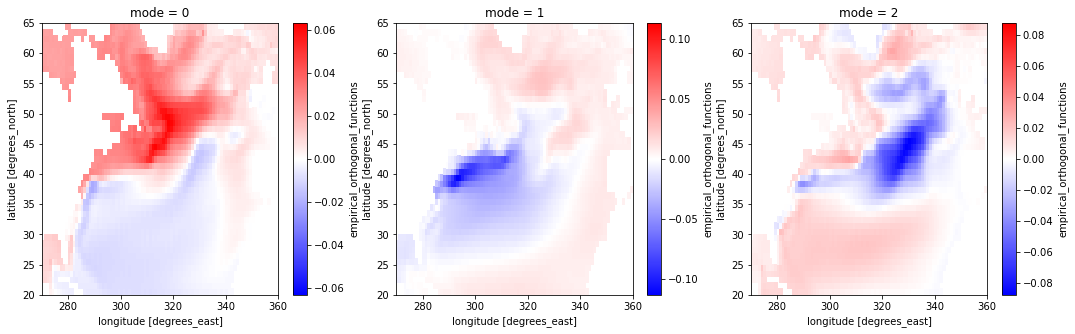

In [5]:
eofs = solver.eofs(neofs=3)
fig, axes = plt.subplots(1,3,figsize=(18,5))
eofs.sel(mode=0).plot(ax=axes[0], cmap='bwr')
eofs.sel(mode=1).plot(ax=axes[1], cmap='bwr')
eofs.sel(mode=2).plot(ax=axes[2], cmap='bwr')
eofs

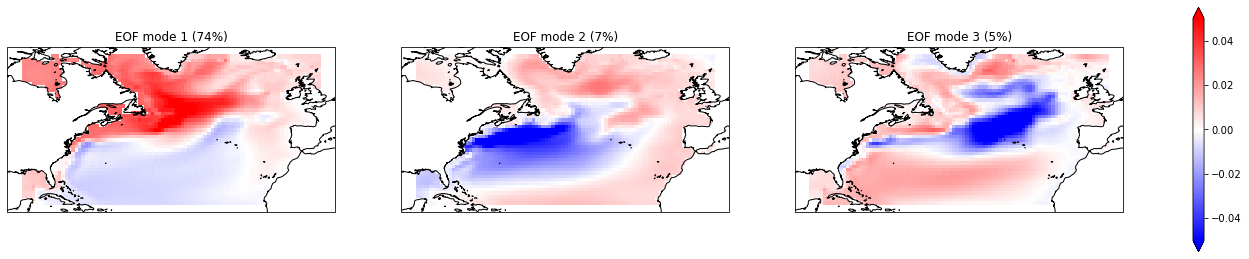

In [7]:
fig = plt.figure(figsize=(25, 6))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(131,projection=pc)
ax1.coastlines()
ax1.pcolormesh(ssh_TL_yra.lon, ssh_TL_yra.lat, eofs.sel(mode=0), vmin=-0.05, vmax=0.05,
               transform=pc,cmap='bwr')
ax1.set_title('EOF mode 1 (74%)')

ax2 = plt.subplot(132,projection=pc)
ax2.coastlines()
ax2.pcolormesh(ssh_TL_yra.lon, ssh_TL_yra.lat, eofs.sel(mode=1), vmin=-0.05, vmax=0.05,
               transform=pc,cmap='bwr')
ax2.set_title('EOF mode 2 (7%)')

ax3 = plt.subplot(133,projection=pc)
ax3.coastlines()
subplt3=ax3.pcolormesh(ssh_TL_yra.lon, ssh_TL_yra.lat, eofs.sel(mode=2), vmin=-0.05,vmax=0.05,
               transform=pc,cmap='bwr')
ax3.set_title('EOF mode 3 (5%)')

# Now adding the colorbar
cb = fig.colorbar(subplt3, ax=[ax1,ax2,ax3], shrink=0.75, extend='both')
# cb.set_label('SSH [cm]')

<xarray.DataArray 'pcs' (time: 251, mode: 3)>
array([[-5.21184564e-01, -7.73800492e-01, -1.47946131e+00],
       [-5.91962874e-01, -1.39998412e+00, -1.54424930e+00],
       [-5.79205394e-01, -4.43649441e-01, -3.87456864e-02],
       [-4.23215836e-01,  1.10779166e+00,  3.96113634e-01],
       [-5.44621944e-01,  1.83378053e+00,  1.20585835e+00],
       [-4.19693828e-01,  2.04852438e+00,  1.37671018e+00],
       [-4.30142522e-01,  1.75536978e+00,  1.08090961e+00],
       [-5.30131698e-01,  1.20260799e+00,  6.12886131e-01],
       [-4.21401888e-01,  2.64259624e+00,  7.98520327e-01],
       [-4.69072431e-01,  9.09965754e-01, -2.16623068e-01],
       [-4.82171863e-01,  1.61761177e+00, -3.18702936e-01],
       [-4.62767392e-01,  8.27018619e-01, -5.54402232e-01],
       [-6.46468520e-01,  7.52013326e-01,  1.35238320e-01],
       [-8.24667513e-01,  1.31342500e-01,  8.50830972e-01],
       [-6.21403098e-01,  5.63885331e-01,  2.64404714e-01],
       [-7.02214897e-01,  2.67591715e-01, -4.08855259e-01],
       [-5.75882196e-01,  1.17775452e+00, -8.47810984e-01],
       [-6.07104719e-01,  4.03541982e-01, -6.83341086e-01],
       [-4.10811722e-01,  1.52170384e+00, -3.00009310e-01],
       [-3.26879591e-01,  1.76332152e+00, -1.48684549e+00],
...
       [ 1.93207765e+00,  1.01484239e-01, -2.44739532e-01],
       [ 2.05996609e+00,  9.78183627e-01,  8.04164410e-01],
       [ 2.09113073e+00,  6.23027623e-01,  6.27440540e-03],
       [ 2.11129332e+00,  4.90637809e-01, -6.51331663e-01],
       [ 1.96832502e+00, -1.24236569e-02, -1.68947294e-01],
       [ 2.06120205e+00, -1.05545223e+00, -1.11959386e+00],
       [ 2.13463974e+00, -1.01386115e-01, -7.33471215e-01],
       [ 2.17119551e+00, -1.41492262e-01, -4.12513286e-01],
       [ 2.39580321e+00, -3.69828433e-01, -1.12090278e+00],
       [ 2.43184495e+00,  4.78634648e-02, -9.48423624e-01],
       [ 2.49687529e+00,  3.37781012e-01, -1.42123961e+00],
       [ 2.64302659e+00,  1.02277827e+00, -1.21265280e+00],
       [ 2.90423417e+00,  1.61308098e+00, -6.50775492e-01],
       [ 2.95889401e+00,  1.01339591e+00,  2.50387400e-01],
       [ 2.90204120e+00, -2.89597243e-01, -1.58084869e+00],
       [ 3.11524415e+00, -2.96903014e-01, -3.66794682e+00],
       [ 3.18991709e+00,  8.36120427e-01, -2.37682605e+00],
       [ 3.20408535e+00,  1.66178393e+00, -1.45881867e+00],
       [ 3.17428207e+00,  5.66306859e-02, -1.72190011e+00],
       [ 3.27333093e+00, -1.41761541e-01, -3.14247584e+00]], dtype=float32)
Coordinates:
  * time     (time) object 1850-07-02 06:00:00 ... 2100-07-02 05:00:00.000003
  * mode     (mode) int64 0 1 2

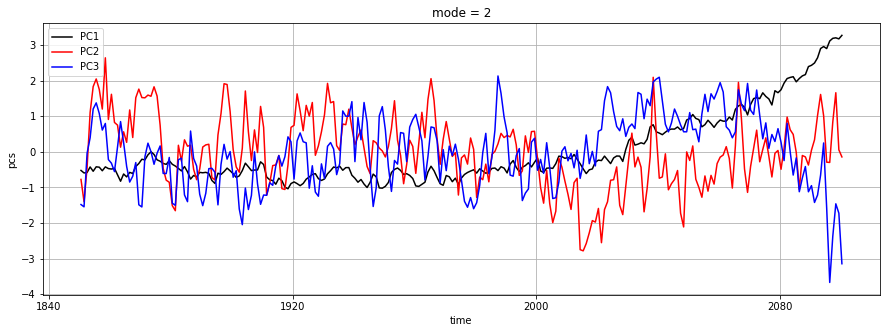

In [9]:
pcs = solver.pcs(npcs=3, pcscaling=1)
fig, axes = plt.subplots(1,1,figsize=(15,5))
pcs.sel(mode=0).plot(ax=axes, color='k',label='PC1')
pcs.sel(mode=1).plot(ax=axes, color='r',label='PC2')
pcs.sel(mode=2).plot(ax=axes, color='b',label='PC3')
plt.legend()
plt.grid()
pcs

<xarray.DataArray 'eofs' (mode: 3, lat: 45, lon: 90)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.83280355,  0.8376416 ,  0.84813875, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.95909154,  0.96566004,  0.97030556, ...,  0.7650814 ,
          0.8198987 ,  0.8654413 ],
        [ 0.97281134,  0.9687862 ,  0.9708463 , ...,  0.7432273 ,
          0.76819783,  0.7855189 ],
        [        nan,         nan,         nan, ...,  0.738996  ,
          0.7274331 ,  0.7814395 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.20645566, -0.2009889 , -0.16910529, ...,         nan,
                 nan,         nan],
...
        [ 0.07987633,  0.06409127,  0.05876702, ...,  0.03682853,
         -0.00555886, -0.03443564],
        [ 0.05262211,  0.06093429,  0.05424703, ...,  0.00193498,
         -0.02854643, -0.05763716],
        [        nan,         nan,         nan, ..., -0.03115526,
         -0.05151636, -0.073012  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.10324326,  0.10117092,  0.0954445 , ...,         nan,
                 nan,         nan],
        ...,
        [ 0.06428973,  0.07400661,  0.07464714, ...,  0.1090523 ,
          0.08595891,  0.05651154],
        [ 0.07630195,  0.07051083,  0.0730883 , ...,  0.17249352,
          0.16482136,  0.14540811],
        [        nan,         nan,         nan, ...,  0.25002366,
          0.22701707,  0.20666243]]], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float32 270.5 271.5 272.5 273.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:  correlation_between_pcs_and_SSH

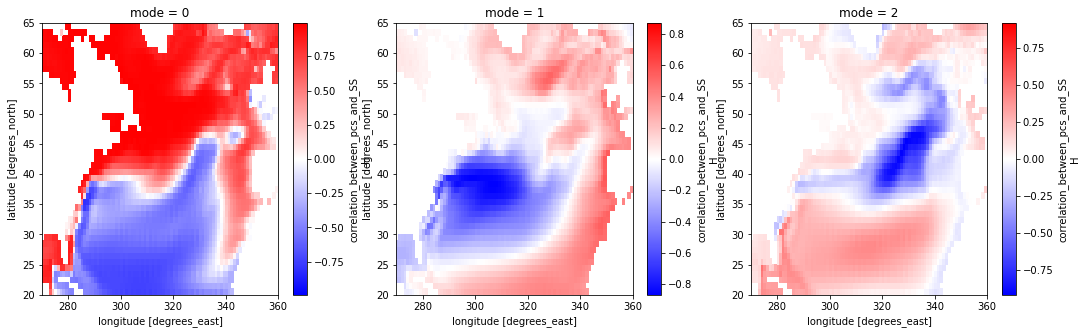

In [7]:
eofcorr = solver.eofsAsCorrelation(neofs=3)
fig, axes = plt.subplots(1,3,figsize=(18,5))
eofcorr.sel(mode=0).plot(ax=axes[0], cmap='bwr')
eofcorr.sel(mode=1).plot(ax=axes[1], cmap='bwr')
eofcorr.sel(mode=2).plot(ax=axes[2], cmap='bwr')
eofcorr